In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import datetime
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/BadgerX Data"

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1DebF_UxJ8HVlNU3YtYGSpTlwMstdY3sb/BadgerX Data


In [2]:
import csv
import numpy as np

frp = np.array(list(csv.reader(open("/content/drive/My Drive/BadgerX Data/UntransformedCSV/2010frp.csv"))), dtype=float)
for i in range(1, 10):
  temp = np.array(list(csv.reader(open("/content/drive/My Drive/BadgerX Data/UntransformedCSV/201"+str(i) + "frp.csv"))),dtype=float)
  print(temp.shape)
  frp = np.concatenate((frp, temp), axis=0)

conf = np.array(list(csv.reader(open("/content/drive/My Drive/BadgerX Data/UntransformedCSV/2010confidence.csv"))), dtype=float)
for i in range(1, 10):
  temp = np.array(list(csv.reader(open("/content/drive/My Drive/BadgerX Data/UntransformedCSV/201"+str(i) + "confidence.csv"))),dtype=float)
  print(temp.shape)
  conf = np.concatenate((conf, temp), axis=0)




(365, 14400)
(366, 14400)
(365, 14400)
(365, 14400)
(365, 14400)
(366, 14400)
(365, 14400)
(365, 14400)
(365, 14400)
(365, 14400)
(366, 14400)
(365, 14400)
(365, 14400)
(365, 14400)
(366, 14400)
(365, 14400)
(365, 14400)
(365, 14400)


In [3]:
frp = frp.reshape(3652*120*120)
conf = conf.reshape(3652*120*120)

In [4]:
import pandas as pd
pd.DataFrame(frp).to_hdf("fullfrp.hdf", key = "frp", mode="w")
pd.DataFrame(conf).to_hdf("fullconfidence.hdf",key = "conf", mode="w")

In [5]:
conf2 = conf.reshape((3652, 120**2))

In [31]:
from scipy import ndimage
dis = []
count = 0

for i in range(3652):

  if np.count_nonzero(conf2[i].reshape(120**2)==0) < 120*120:
    x = conf2[i].reshape((120,120))
    x2 = (ndimage.distance_transform_edt(np.logical_not(x)))
    dis.append(1/(x2 + 0.5))
  
  else:
    count += 1
    dis.append(np.zeros((120,120)))

print(count)

1273


In [33]:
dis2 = []
oop = [[0, 0],[0, 0]]
print(np.count_nonzero(np.array(oop).reshape(4)==0))
if np.count_nonzero(np.array(oop).reshape(4)==0) < 4:
    x = oop
    x2 = (ndimage.distance_transform_edt(np.logical_not(x)))
    dis2.append(1/(x2+0.5))
else:
    dis2.append(np.zeros((2,2)))

print(dis2)

4
[array([[0., 0.],
       [0., 0.]])]


(3652, 14400)


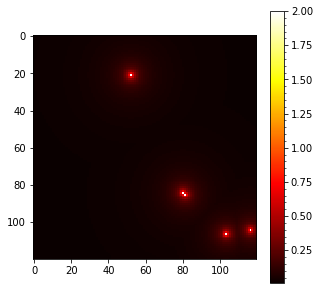

In [52]:
import matplotlib.lines as mlines
print(np.array(dis).shape)
fig, (ax1) = plt.subplots(figsize=(5,5), ncols=1)
lolol = ax1.imshow(np.array(dis[230]).reshape(120,120), cmap='hot', interpolation='none')
cbar = fig.colorbar(lolol, ax=ax1)
cbar.minorticks_on()
plt.show()

dis = np.array(dis).reshape((3652,120**2)).reshape(3652*120**2)

In [53]:
print(dis.shape)
pd.DataFrame(dis).to_hdf("fulldistofire.hdf", key="v", mode="w")

(52588800,)
